In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('carprice.csv')

In [3]:
df

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
5949,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
5950,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
5951,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [4]:
df['Location'].unique()

array(['Pune', 'Chennai', 'Coimbatore', 'Jaipur', 'Mumbai', 'Kochi',
       'Kolkata', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad'],
      dtype=object)

In [5]:
df.isna().sum()

ID                     0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage_kmpl           2
Engine_CC             36
Power_bhp            142
Seats                 42
Price                  0
dtype: int64

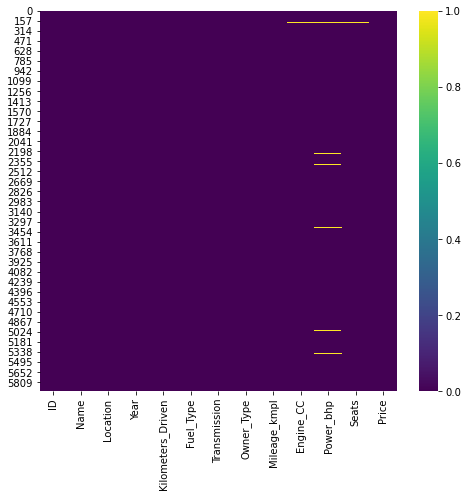

In [6]:
plt.figure(figsize=(8,7))
sns.heatmap(df.isna(), cmap='viridis')

In [7]:
df['Mileage_kmpl'] = df['Mileage_kmpl'].fillna(df['Mileage_kmpl'].mean())

In [8]:
df['Engine_CC'] = df['Engine_CC'].fillna(df['Engine_CC'].mean())

In [9]:
df['Power_bhp'] = df['Power_bhp'].fillna(df['Power_bhp'].mean())

In [14]:
df['Seats'] = df['Seats'].fillna(df['Seats'].median())

In [15]:
df.isna().sum()

ID                   0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage_kmpl         0
Engine_CC            0
Power_bhp            0
Seats                0
Price                0
dtype: int64

In [16]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

In [17]:
df_1 = df.drop(columns=['ID','Name'])

In [18]:
df_1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [19]:
#### Seleksi Feature via EDA

In [20]:
pd.crosstab(index=df['Location'], columns='Avg Price', values=df['Price'], aggfunc='mean')

col_0,Avg Price
Location,
Ahmedabad,8.531312
Bangalore,13.328631
Chennai,7.768476
Coimbatore,15.078223
Delhi,9.830846
Hyderabad,9.864393
Jaipur,5.825036
Kochi,11.264852
Kolkata,5.661215


In [21]:
df_1 = pd.get_dummies(data=df_1, columns=['Location','Fuel_Type','Transmission','Owner_Type'])

In [22]:
df_1.corr()['Price']

Year                         0.306539
Kilometers_Driven           -0.011548
Mileage_kmpl                -0.304743
Engine_CC                    0.655976
Power_bhp                    0.766876
Seats                        0.050594
Price                        1.000000
Location_Ahmedabad          -0.017766
Location_Bangalore           0.085180
Location_Chennai            -0.047548
Location_Coimbatore          0.170350
Location_Delhi               0.008008
Location_Hyderabad           0.010581
Location_Jaipur             -0.090270
Location_Kochi               0.053225
Location_Kolkata            -0.108748
Location_Mumbai              0.000320
Location_Pune               -0.082053
Fuel_Type_Diesel             0.316729
Fuel_Type_Electric           0.005433
Fuel_Type_Petrol            -0.316945
Transmission_Automatic       0.584504
Transmission_Manual         -0.584504
Owner_Type_First             0.091836
Owner_Type_Fourth & Above   -0.021718
Owner_Type_Second           -0.073427
Owner_Type_T

In [23]:
df_2 = pd.get_dummies(data=df, columns=['Location'])

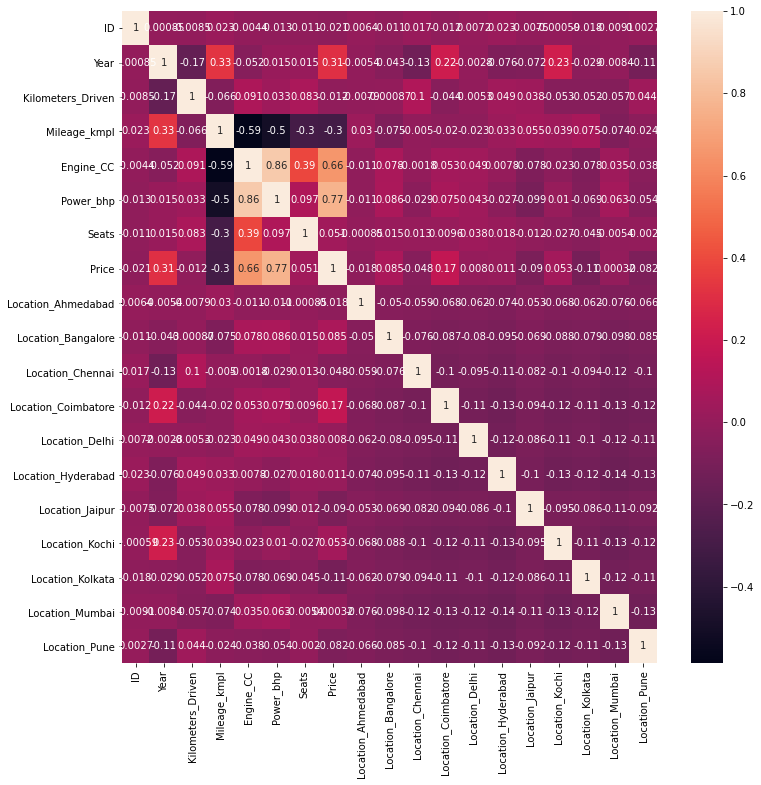

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df_2.corr(), annot=True)

In [26]:
df_2.corr()[['Price']]

,Price
ID,-0.020702
Year,0.306539
Kilometers_Driven,-0.011548
Mileage_kmpl,-0.304743
Engine_CC,0.655976
Power_bhp,0.766876
Seats,0.050594
Price,1.000000
Location_Ahmedabad,-0.017766
Location_Bangalore,0.085180


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_1.drop(columns='Price')
y = df_1['Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=42)

In [31]:
X_train.head()

,Year,Kilometers_Driven,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4329,2016,60913,20.73,1373.0,91.100000,5.0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,0
2644,2017,40459,19.67,1582.0,126.200000,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
642,2004,200000,0.00,1086.0,113.803144,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
5901,2018,1048,18.90,998.0,67.100000,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
2177,2013,96000,23.50,1498.0,90.000000,5.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [32]:
### Modeling

In [33]:
### Base Model

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, SVC

#SVR => Untuk Regresi 
#SVC => Untuk Klasifikasi 

In [36]:
KNN_1 = KNeighborsRegressor()

In [38]:
KNN_1.fit(X_train, y_train)

KNeighborsRegressor()

In [39]:
SVM_1 = SVR()

In [40]:
SVM_1.fit(X_train, y_train)

SVR()

In [41]:
### EVA MATRIX 


In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
def Eva_Matrix_DF(Model, X_train, X_test, y_train, y_test, Nama):
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train,y_pred_tr)
    MSE_tr = mean_squared_error(y_train,y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts= Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test,y_pred_ts)
    MSE_ts = mean_squared_error(y_test,y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
        "Training " + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
        "Testing " + Nama : [R2_ts, MAE_ts, MSE_ts, RMSE_ts]
    }
    df = pd.DataFrame(data=data, index=['R2','MAE','MSE','RMSE'])
    return df

In [44]:
df_KNN = Eva_Matrix_DF(KNN_1, X_train, X_test, y_train, y_test, "KNN")
df_KNN

,Training KNN,Testing KNN
R2,0.729540,0.529352
MAE,3.224958,4.072930
MSE,33.152769,65.962398
RMSE,5.757844,8.121724


In [45]:
df_SVM = Eva_Matrix_DF(SVM_1, X_train, X_test, y_train, y_test, "KNN")
df_SVM

,Training KNN,Testing KNN
R2,-0.078943,-0.066116
MAE,5.916540,5.983469
MSE,132.256041,149.418656
RMSE,11.500263,12.223692


In [46]:
### Improvment

In [47]:
### Feature Enginerring

In [48]:
df.head()

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [50]:
name = 'Audi A4 New 2.0 TDI Multitronic'
name.split(' ')[0]

'Audi'

In [51]:
df['Brand'] = df['Name'].apply(lambda x: x.split(' ')[0])

In [53]:
df['Brand'].nunique()

31

In [54]:
df['Brand'].value_counts()

Maruti           1157
Hyundai          1098
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Bentley             1
Ambassador          1
Lamborghini         1
Isuzu               1
Name: Brand, dtype: int64

In [56]:
df_3 = df.drop(columns=['ID', 'Name', 'Brand'])

In [57]:
df_3

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...
5948,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
5949,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
5950,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
5951,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [58]:
num_col = df_3[['Year', 'Kilometers_Driven','Mileage_kmpl','Engine_CC', 'Power_bhp','Seats']]

In [59]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [60]:
sc = RobustScaler()

In [61]:
sc_df = sc.fit_transform(num_col)

In [62]:
df_sc = pd.DataFrame(sc_df)

In [64]:
df_Full = pd.concat([df_3, df_sc], axis=1)

In [65]:
df_Full.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,0,1,2,3,4,5
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0.2,-0.307692,0.261824,0.109415,0.466216,0.0
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,-0.6,-0.179487,0.013514,-0.377863,-0.167230,0.0
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,-0.4,0.871795,0.447635,-0.315522,-0.166216,2.0
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,-0.2,-0.316154,-0.493243,0.600509,0.712838,0.0
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,-0.2,0.871769,0.837838,-0.044529,-0.599662,0.0


In [66]:
df_Full.drop(columns=['Year', 'Kilometers_Driven','Mileage_kmpl','Engine_CC', 'Power_bhp','Seats'], inplace=True)

In [67]:
df_Full['Transmission'] = df_Full['Transmission'].map({'Manual' : 0, 'Automatic' : 1})

In [68]:
df_Full = pd.get_dummies(df_Full, columns=['Location','Fuel_Type','Owner_Type'])

In [69]:
df_Full.head()

,Transmission,Price,0,1,2,3,4,5,Location_Ahmedabad,Location_Bangalore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,12.50,0.2,-0.307692,0.261824,0.109415,0.466216,0.0,0,0,...,0,0,1,1,0,0,1,0,0,0
1,0,4.50,-0.6,-0.179487,0.013514,-0.377863,-0.167230,0.0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,6.00,-0.4,0.871795,0.447635,-0.315522,-0.166216,2.0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,17.74,-0.2,-0.316154,-0.493243,0.600509,0.712838,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,3.50,-0.2,0.871769,0.837838,-0.044529,-0.599662,0.0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [70]:
## Splitting dATA 

In [71]:
X_2 = df_Full.drop(columns='Price')
y_2 = df_Full['Price']

In [72]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_2, y_2, train_size=.20, random_state=42)

In [73]:
### Modeling

In [74]:
KNN_scaled = KNeighborsRegressor()

In [75]:
KNN_scaled.fit(X_train_sc, y_train_sc)

KNeighborsRegressor()

In [76]:
SVM_scaled = SVR()

In [77]:
SVM_scaled.fit(X_train_sc, y_train_sc)

SVR()

In [78]:
df_KNN2 = Eva_Matrix_DF(KNN_scaled, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'KNN Scaled')

In [79]:
df_KNN2

,Training KNN Scaled,Testing KNN Scaled
R2,0.870091,0.744161
MAE,2.114266,2.756184
MSE,16.650394,32.126037
RMSE,4.080489,5.667983


In [80]:
df_SVM2 = Eva_Matrix_DF(SVM_scaled, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'SVM Scaled')
df_SVM2

,Training SVM Scaled,Testing SVM Scaled
R2,0.665275,0.640384
MAE,2.550252,2.621617
MSE,42.901650,45.157541
RMSE,6.549935,6.719936
